In [1]:
import numpy as np
import pandas as pd

# read data file
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/train.csv")

# Exploratory Data Analysis

### Check For Missing Values

In [2]:
train.isnull().sum()
# Age is missing 177 rows of data
# cabin is missing 687 rows of data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# convert categorical columns to pandas categorical data type
train['Survived'] = pd.Categorical(train.Survived)
train['Pclass'] = pd.Categorical(train.Pclass)
train['Sex'] = pd.Categorical(train.Sex)
train['Embarked'] = pd.Categorical(train.Embarked)

In [5]:
# only two observations missings embarked value - can be dropped
train = train[train['Embarked'].notna()].reset_index(drop=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


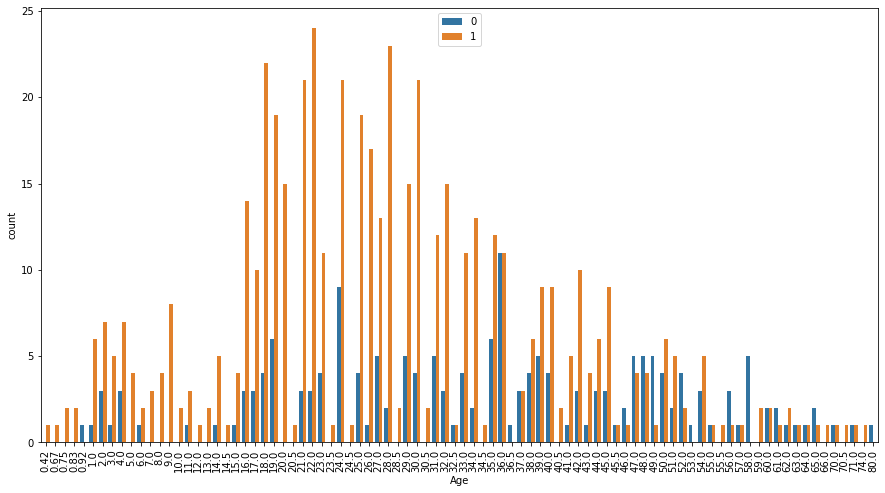

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# determine why there are so many missing cabin values
# age vs cabin
# - dataframe of null cabin values and non-null
cabin_present = [1 if pd.isna(value) else 0 for value in list(train['Cabin'].to_numpy())]
cabin_present = pd.DataFrame(cabin_present)

# - plot bar graph of age and cabins present
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Age', hue = cabin_present[0], data = train)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()
# cabin data is missing for almost all
# does not seem to be correlated with the way its missing
# beneficial to drop cabin column as it may add extra noise
train.drop('Cabin', 1, inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

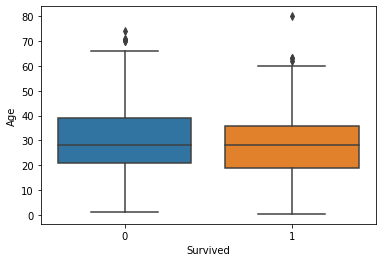

In [7]:
# determine relationship between age and survival
sns.boxplot(y="Age", x="Survived", data=train)
# 0 means not survived and 1 means survived
# some discrepancies

In [8]:
# a lot of missing age values
# however, age could be a factor to aid in predicting if someone survived or not
# impute average age based on titles

# - extract titles from names
def title(row):
    name = row['Name']
    for name in name.split():
        if '.' in name:
            return name
            break
train['Title'] = train.apply(lambda row: title(row), axis=1)

# - determine average age for each title
average_by_title = train.groupby('Title')['Age'].mean().to_dict()

# - use these averages to fill in for missing age values based on title
train['Age'] = train.apply(
    lambda row: average_by_title[row['Title']] if (np.isnan(row['Age'])) else None,
    axis = 1
)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          177 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
 11  Title        889 non-null    object  
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


### Check For Wrong Entries or Special Characters

In [9]:
# for col in train.columns:
#         print('{} : {}'.format(col,train[col].unique()))
# no wrong entries or special characters